In [5]:
import pandas as pd

def convert(filename: str) -> pd.DataFrame:
    f = open(filename + ".txt", mode="r")
    content = f.readlines()
    f.close()

    logs = [{}]
    
    # Parse the lines
    for l in content:
        if l != "\n":
            (l1, l2) = l.split(": ", maxsplit=1)
            logs[-1][l1] = l2.replace("\n", "")
            # Params aren't parsed
            # [{Start: "XXX", End: "XXX", Params: "A=1  B=2", ...}, ...]
        else:
            logs.append({})
    
    logs.remove(logs[-1])

    # Parse the Params
    for l in logs:
        params = l["Params"].split("  ")
        l["Params"] = {}
        for p in params:
            if (p != ""):
                (p1, p2) = p.split("=", maxsplit=1)
                l["Params"][p1] = float(p2)
                l[p1] = float(p2) # Unwrap Params

    df_logs = pd.DataFrame(logs)

    df_export = df_logs[["Start", "End", "Params", "Evaluation"]]
    df_export.to_json(filename + ".json", orient="records", date_format="%Y-%m-%d %H:%M:%S")
    df_export.to_csv(filename + ".csv", index=False, date_format="%Y-%m-%d %H:%M:%S")

    df_logs.Start = pd.to_datetime(df_logs.Start)
    df_logs.End = pd.to_datetime(df_logs.End)

    return df_logs

# df_logs = convert("log_20210827_090651")
# df_logs = convert("log_20210830_112502")
df_logs = convert("log_20210906_120725")

df_logs

,Start,End,Params,Evaluation,bunker_time,reload_amplitude,reload_time,reload_repetition,reload_stabilization_time,tp_id
0,2021-09-06 12:12:27,2021-09-06 12:17:27,"{'bunker_time': 1211.0, 'reload_amplitude': 27...",58.125,1211.0,27.0,46.0,24.0,471.0,0.0
1,2021-09-06 12:22:30,2021-09-06 12:27:30,"{'bunker_time': 2031.0, 'reload_amplitude': 56...",37.674418604651166,2031.0,56.0,23.0,20.0,664.0,0.0
2,2021-09-06 12:32:32,2021-09-06 12:37:32,"{'bunker_time': 1662.0, 'reload_amplitude': 26...",63.58565737051792,1662.0,26.0,48.0,20.0,387.0,0.0
3,2021-09-06 12:44:35,2021-09-06 12:49:35,"{'bunker_time': 1728.0, 'reload_amplitude': 49...",63.70370370370371,1728.0,49.0,43.0,20.0,266.0,0.0
4,2021-09-06 12:54:37,2021-09-06 12:59:37,"{'bunker_time': 2306.0, 'reload_amplitude': 38...",49.11196911196912,2306.0,38.0,29.0,12.0,477.0,0.0
5,2021-09-06 13:04:40,2021-09-06 13:09:40,"{'bunker_time': 2400.0, 'reload_amplitude': 25...",0,2400.0,25.0,20.0,10.0,250.0,0.0
6,2021-09-06 13:15:55,2021-09-06 13:20:55,"{'bunker_time': 1678.0, 'reload_amplitude': 26...",62.608695652173914,1678.0,26.0,48.0,20.0,386.0,0.0
7,2021-09-06 13:25:57,2021-09-06 13:30:57,"{'bunker_time': 1734.0, 'reload_amplitude': 26...",63.10756972111554,1734.0,26.0,50.0,18.0,389.0,0.0
8,2021-09-06 13:36:00,2021-09-06 13:41:00,"{'bunker_time': 1203.0, 'reload_amplitude': 25...",59.516129032258064,1203.0,25.0,45.0,25.0,399.0,0.0
9,2021-09-06 13:47:25,2021-09-06 13:52:25,"{'bunker_time': 2301.0, 'reload_amplitude': 27...",66.02409638554217,2301.0,27.0,50.0,15.0,385.0,0.0


array([<AxesSubplot:xlabel='Start'>, <AxesSubplot:xlabel='Start'>,
       <AxesSubplot:xlabel='Start'>, <AxesSubplot:xlabel='Start'>,
       <AxesSubplot:xlabel='Start'>, <AxesSubplot:xlabel='Start'>],
      dtype=object)

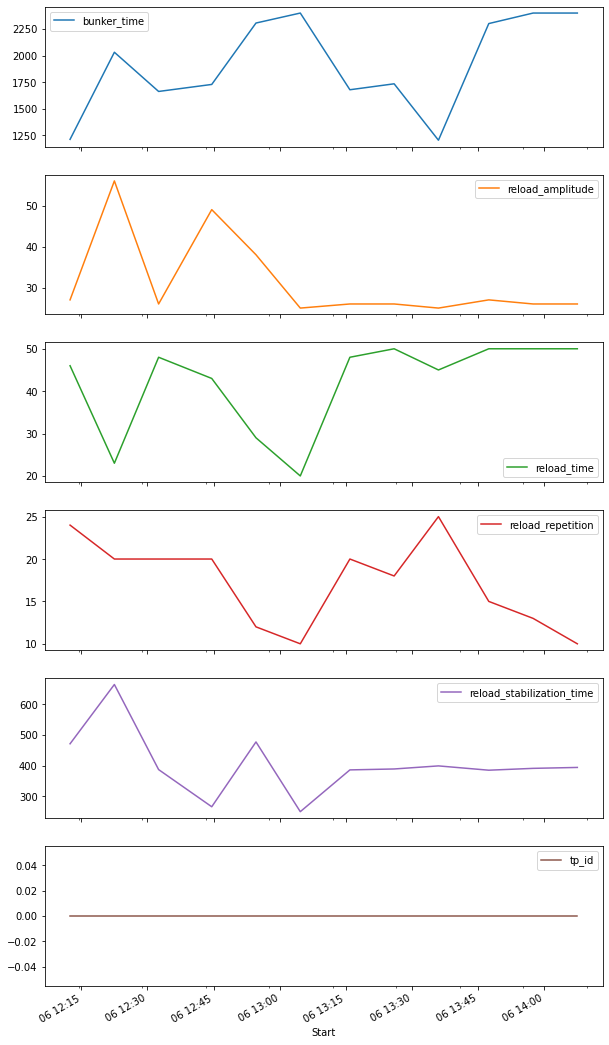

In [6]:
df_logs.plot(
    x="Start",
    y=[
        "bunker_time",
        "reload_amplitude",
        "reload_time",
        "reload_repetition",
        "reload_stabilization_time",
        "tp_id"
    ],
    subplots=True,
    figsize=(10, 20)
)